# Taxi OOMDP

This notebook tests and evaluates different algorithms on the Taxi World OOMDP

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Simple RL tests

Tests of the taxi MDP as provided by the `simple_rl` package

In [10]:
import sys

from simple_rl.agents import QLearningAgent, RandomAgent, LinearQAgent, DQNAgent, RMaxAgent
from simple_rl.tasks import TaxiOOMDP
from simple_rl.run_experiments import run_agents_on_mdp, run_single_agent_on_mdp

In [3]:
# Agent and MDP definitions
# agent = {"x":1, "y":1, "has_passenger":0}
# passengers = [{"x":3, "y":2, "dest_x":2, "dest_y":3, "in_taxi":0}]
# walls = []
# mdp = TaxiOOMDP(width=4, height=4, agent=agent, walls=walls, passengers=passengers)

# agent = {"x":6, "y":10, "has_passenger":0}
# passengers = [{"x":2, "y":2, "dest_x":10, "dest_y":10, "in_taxi":0}]
# walls = [
#     {"x": 1, "y": 1}, {"x": 2, "y": 1}, {"x": 3, "y": 1}, {"x": 4, "y": 1}, {"x": 5, "y": 1}, {"x": 6, "y": 1}, {"x": 7, "y": 1}, {"x": 8, "y": 1}, {"x": 9, "y": 1}, {"x": 10, "y": 1}, {"x": 11, "y": 1},
#     {"x": 1, "y": 2}, {"x": 1, "y": 3}, {"x": 1, "y": 4}, {"x": 1, "y": 5}, {"x": 1, "y": 6}, {"x": 1, "y": 7}, {"x": 1, "y": 8}, {"x": 1, "y": 9}, {"x": 1, "y": 10}, {"x": 1, "y": 11},
#     {"x": 11, "y": 2}, {"x": 11, "y": 3}, {"x": 11, "y": 4}, {"x": 11, "y": 5}, {"x": 11, "y": 6}, {"x": 11, "y": 7}, {"x": 11, "y": 8}, {"x": 11, "y": 9}, {"x": 11, "y": 10}, {"x": 11, "y": 11},
#     {"x": 2, "y": 11}, {"x": 3, "y": 11}, {"x": 4, "y": 11}, {"x": 5, "y": 11}, {"x": 6, "y": 11}, {"x": 7, "y": 11}, {"x": 8, "y": 11}, {"x": 9, "y": 11}, {"x": 10, "y": 11},
#     {"x": 3, "y": 2}, {"x": 3, "y": 3}, {"x": 3, "y": 4}, {"x": 3, "y": 5},
#     {"x": 7, "y": 2}, {"x": 7, "y": 3}, {"x": 7, "y": 4}, {"x": 7, "y": 5},
#     {"x": 5, "y": 7}, {"x": 5, "y": 8}, {"x": 5, "y": 9}, {"x": 5, "y": 10},
# ]
# mdp = TaxiOOMDP(width=11, height=11, agent=agent, walls=walls, passengers=passengers)

agent = {"x":5, "y":6, "has_passenger":0}
passengers = [{"x":2, "y":2, "dest_x":6, "dest_y":6, "in_taxi":0}]
walls = [
    {"x": 1, "y": 1}, {"x": 2, "y": 1}, {"x": 3, "y": 1}, {"x": 4, "y": 1}, {"x": 5, "y": 1}, {"x": 6, "y": 1}, {"x": 7, "y": 1},
    {"x": 1, "y": 2}, {"x": 1, "y": 3}, {"x": 1, "y": 4}, {"x": 1, "y": 5}, {"x": 1, "y": 6}, {"x": 1, "y": 7},
    {"x": 7, "y": 2}, {"x": 7, "y": 3}, {"x": 7, "y": 4}, {"x": 7, "y": 5}, {"x": 7, "y": 6}, {"x": 7, "y": 7},
    {"x": 2, "y": 7}, {"x": 3, "y": 7}, {"x": 4, "y": 7}, {"x": 5, "y": 7}, {"x": 6, "y": 7},
    {"x": 3, "y": 2}, {"x": 3, "y": 3},
    {"x": 4, "y": 5}, {"x": 4, "y": 6},
    {"x": 5, "y": 2}, {"x": 5, "y": 3},
]
mdp = TaxiOOMDP(width=7, height=7, agent=agent, walls=walls, passengers=passengers)

In [12]:
# Define the agents
ql_agent = QLearningAgent(actions=mdp.get_actions())
rand_agent = RandomAgent(actions=mdp.get_actions())
linear_ql_agent = LinearQAgent(actions=mdp.get_actions(), num_features=mdp.get_num_state_feats())
dqn_agent = DQNAgent(actions=mdp.get_actions(), x_dim=mdp.get_num_state_feats(), y_dim=1, num_channels=1)
rmax_agent = RMaxAgent(actions=mdp.get_actions(), s_a_threshold=2)

In [ ]:
# Train and visualize one of the agents
# run_single_agent_on_mdp(rand_agent, mdp, episodes=100, steps=1000)
mdp.visualize_agent(rand_agent)

Running experiment: 
(MDP)
	taxi_h-7_w-7
(Agents)
	dqn-deep-mind,0
	Linear-Q,1
	Q-learning,2
	Random,3
(Params)
	instances : 3
	episodes : 500
	steps : 1000
	gamma : 0.99
	track_disc_reward : False
	is_lifelong : False

dqn-deep-mind is learning.
  Instance 1 of 3.
Loss for step 10000: 13.027414321899414
Loss for step 20000: 5.235321521759033
Loss for step 30000: 1.386382818222046
Loss for step 40000: 0.20523139834403992
Loss for step 50000: 0.06893188506364822
Loss for step 60000: 0.0730670690536499
Loss for step 70000: 0.061183780431747437
Loss for step 80000: 0.05680966004729271
Loss for step 90000: 0.07916292548179626
Loss for step 100000: 0.06173044070601463
At step 100000, saved model to /tmp/dqn-deep-mind.ckpt
Loss for step 110000: 0.07236495614051819
Loss for step 120000: 0.07496293634176254
Loss for step 130000: 0.026934955269098282
Loss for step 140000: 0.05716707929968834
Loss for step 150000: 0.08176855742931366
Loss for step 160000: 0.06938240677118301
Loss for step 170000

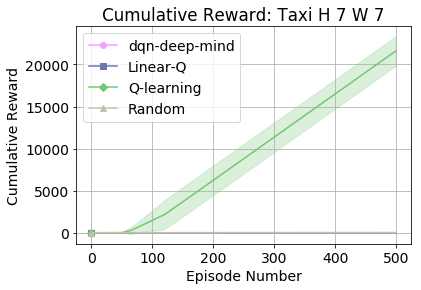

In [15]:
run_agents_on_mdp(
    [dqn_agent, linear_ql_agent, ql_agent, rand_agent],
    mdp, instances=3, episodes=500, steps=1000,
    reset_at_terminal=True, open_plot=False
)

## Baselines RL tests

Tests of the Taxi MDP with the algorithms in baselines

In [ ]:
train.launch(
    'Taxi-OOMDP-v0',
    logdir=None,
    n_epochs=50,
    num_cpu=1,
    seed=0,
    policy_save_interval=5,
    replay_strategy="none",
    clip_return=1
)